# Calling a topojson file of Seoul

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
plt.xkcd()
seoul=gpd.read_file('C:/LucyPark/seoul-maps-master/seoul-maps-master/juso/2015/json/seoul_municipalities_geo.json')
#https://github.com/southkorea/seoul-maps/tree/master/juso/2015/json
#위 주소에서 다운 가능함

In [2]:
seoul.head()

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry
0,11320,도봉구,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.019851357 37.70088490199998, 127..."
1,11380,은평구,Eunpyeong-gu,1,0.003041,0.327143,"POLYGON ((126.951737263 37.654891147, 126.9518..."
2,11230,동대문구,Dongdaemun-gu,2,0.001453,0.182837,"POLYGON ((127.07109526 37.60732730400002, 127...."
3,11590,동작구,Dongjak-gu,3,0.001670,0.237796,"POLYGON ((126.954724306 37.51603819799999, 126..."
4,11545,금천구,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.879936983 37.48606235900002, 126..."


# Making a test data set of voter turnout by 'gu'

In [3]:
votes={             #저는 자료가 없어 직접 만들었습니다
    '도봉구':37.6,
    '은평구':35.4,
    '동대문구':36.9,
    '동작구':38.9,
    '금천구':33.8,
    '구로구':36.7,
    '종로구':39.5,
    '강북구':35.6,
    '중랑구':39.5,
    '강남구':38.3,
    '강서구':36.2,
    '중구':40.2,
    '강동구':36.2,
    '광진구':35.8,
    '마포구':38.1,
    '관악구':36.6,
    '서초구':40.2,
    '성북구':37.1,
    '노원구':38.6,
    '송파구':38.2,
    '성동구':37.2,
    '서대문구':38.0,
    '양천구':37.5,
    '영등포구':37.3,
    '용산구':37.6}

# Making a DataFrame out of the dict 'votes' above

In [4]:
votes_df=pd.DataFrame(list(votes.items()),columns=['SIG_KOR_NM', 'percent'])
votes_df.head()

,SIG_KOR_NM,percent
0,도봉구,37.6
1,은평구,35.4
2,동대문구,36.9
3,동작구,38.9
4,금천구,33.8


# Merging two DataFrames

In [5]:
data_result=pd.merge(seoul,votes_df,on='SIG_KOR_NM')

# Making a column 'sum', showing 'Gu:turnout' 

In [6]:
data_result["sum"] = data_result["SIG_KOR_NM"].map(str) +' \n '+ data_result["percent"].map(str) +'%'
data_result.head()

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry,percent,sum
0,11320,도봉구,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.019851357 37.70088490199998, 127...",37.6,도봉구 \n 37.6%
1,11380,은평구,Eunpyeong-gu,1,0.003041,0.327143,"POLYGON ((126.951737263 37.654891147, 126.9518...",35.4,은평구 \n 35.4%
2,11230,동대문구,Dongdaemun-gu,2,0.001453,0.182837,"POLYGON ((127.07109526 37.60732730400002, 127....",36.9,동대문구 \n 36.9%
3,11590,동작구,Dongjak-gu,3,0.001670,0.237796,"POLYGON ((126.954724306 37.51603819799999, 126...",38.9,동작구 \n 38.9%
4,11545,금천구,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.879936983 37.48606235900002, 126...",33.8,금천구 \n 33.8%


# Activating Korean letters on matplotlib plots

In [7]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRE.TTF").get_name() #혁님이 요청하신 'HY고딕' 입니다!
rc('font', family=font_name)

#  Plotting Seoul map with voter turnout

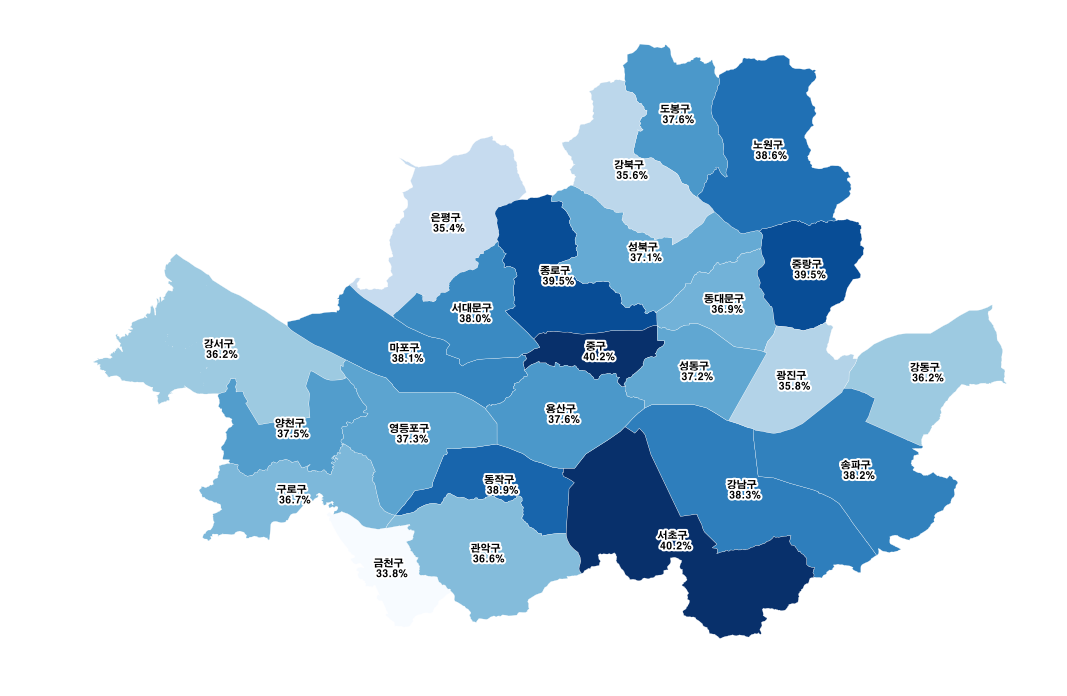

In [8]:
final_pic=data_result.plot( figsize=(18,15),linewidth=0.25, edgecolor='white', column='percent',cmap='Blues')

for index,row in data_result.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    plt.annotate(row['sum'],xy=xy[0], xytext=xytext[0],  horizontalalignment='center',verticalalignment='center')
    plt.axis('off')
plt.show()

# Saving the plot as a png file

In [9]:
seoul_fig=final_pic.get_figure()
seoul_fig.savefig('C:/Users/Jinoo/Pictures/geojson/seoui_map.png',transparent=True)

# Cropping the margin of the map

In [12]:
from PIL import Image
im=Image.open('C:/Users/Jinoo/Pictures/geojson/seoui_map.png')
cropImage=im.crop((150,220,1180,880))
cropImage.save('C:/Users/Jinoo/Pictures/geojson/cropped_seoul(5).png',transparent=True)